In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
path = '/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets'

In [4]:
classes = os.listdir(path)
classes

['lung_aca', 'lung_scc', 'lung_n']

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

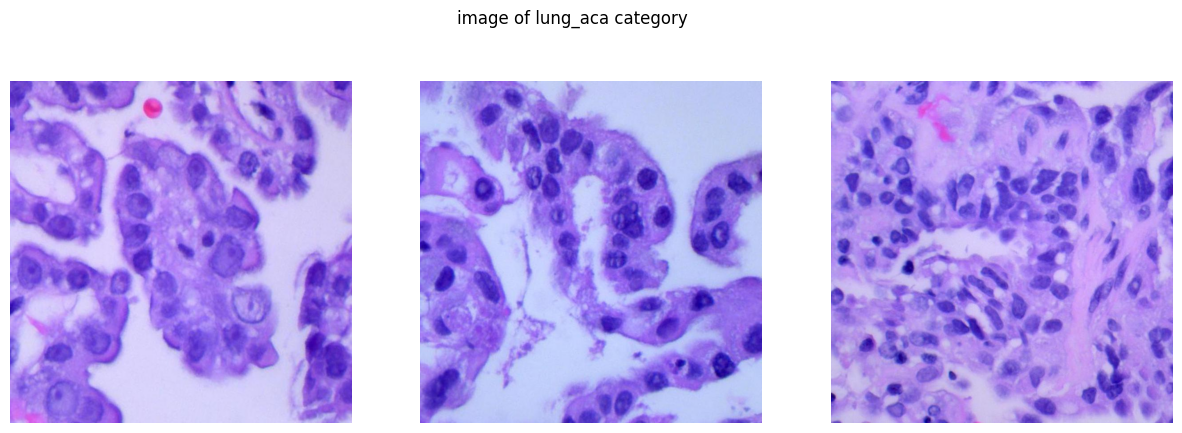

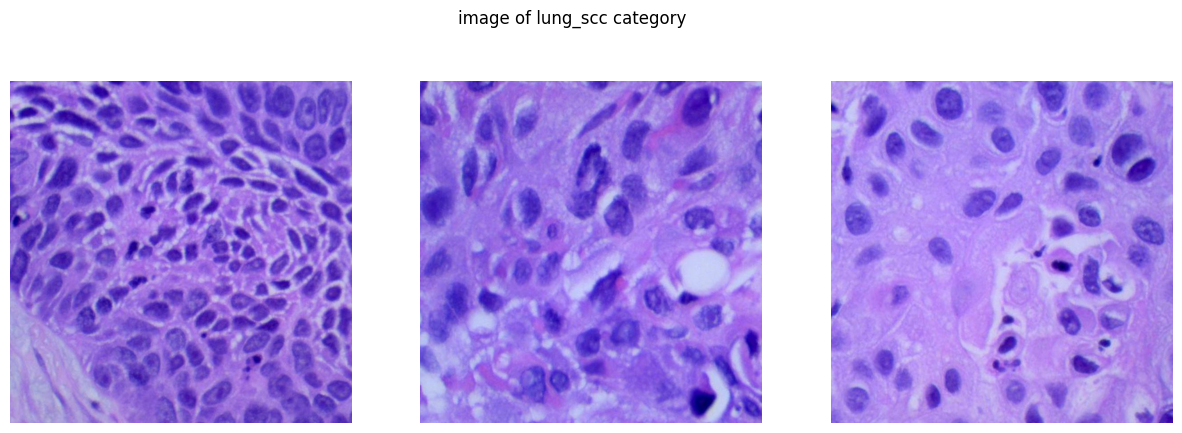

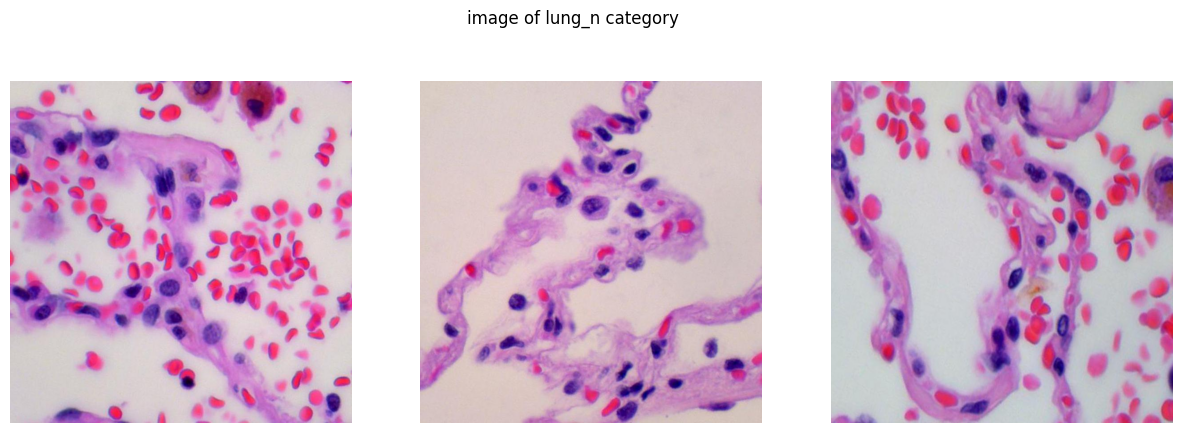

In [6]:
for category in classes:
    img_dir = f'{path}/{category}'
    img = os.listdir(img_dir)

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle(f'image of {category} category')

    for i in range(3):
        k = np.random.randint(0,len(img))
        image = np.array(Image.open(f'{path}/{category}/{img[k]}'))
        ax[i].imshow(image)
        ax[i].axis('off')

    plt.show()

In [7]:
from glob import glob
import cv2

In [22]:
X = []
y = []

for i, category in enumerate(classes):
    img = glob(f'{path}/{category}/*.jpeg')

    for images in img:
        image = cv2.imread(images)

        X.append(cv2.resize(image,(256,256)))
        y.append(i)

X = np.asarray(X)
one_hot_encoded_y = pd.get_dummies(y).values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,one_hot_encoded_y,
                                                test_size=0.2,
                                                random_state=2022)

In [10]:
print(X_train.shape,X_test.shape)

(12000, 256, 256, 3) (3000, 256, 256, 3)


In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [12]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32,
                 kernel_size=(5,5),
                 activation='relu',
                 input_shape=(256,256,3),
                 padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(256,256,3),
                 padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(256,256,3),
                 padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

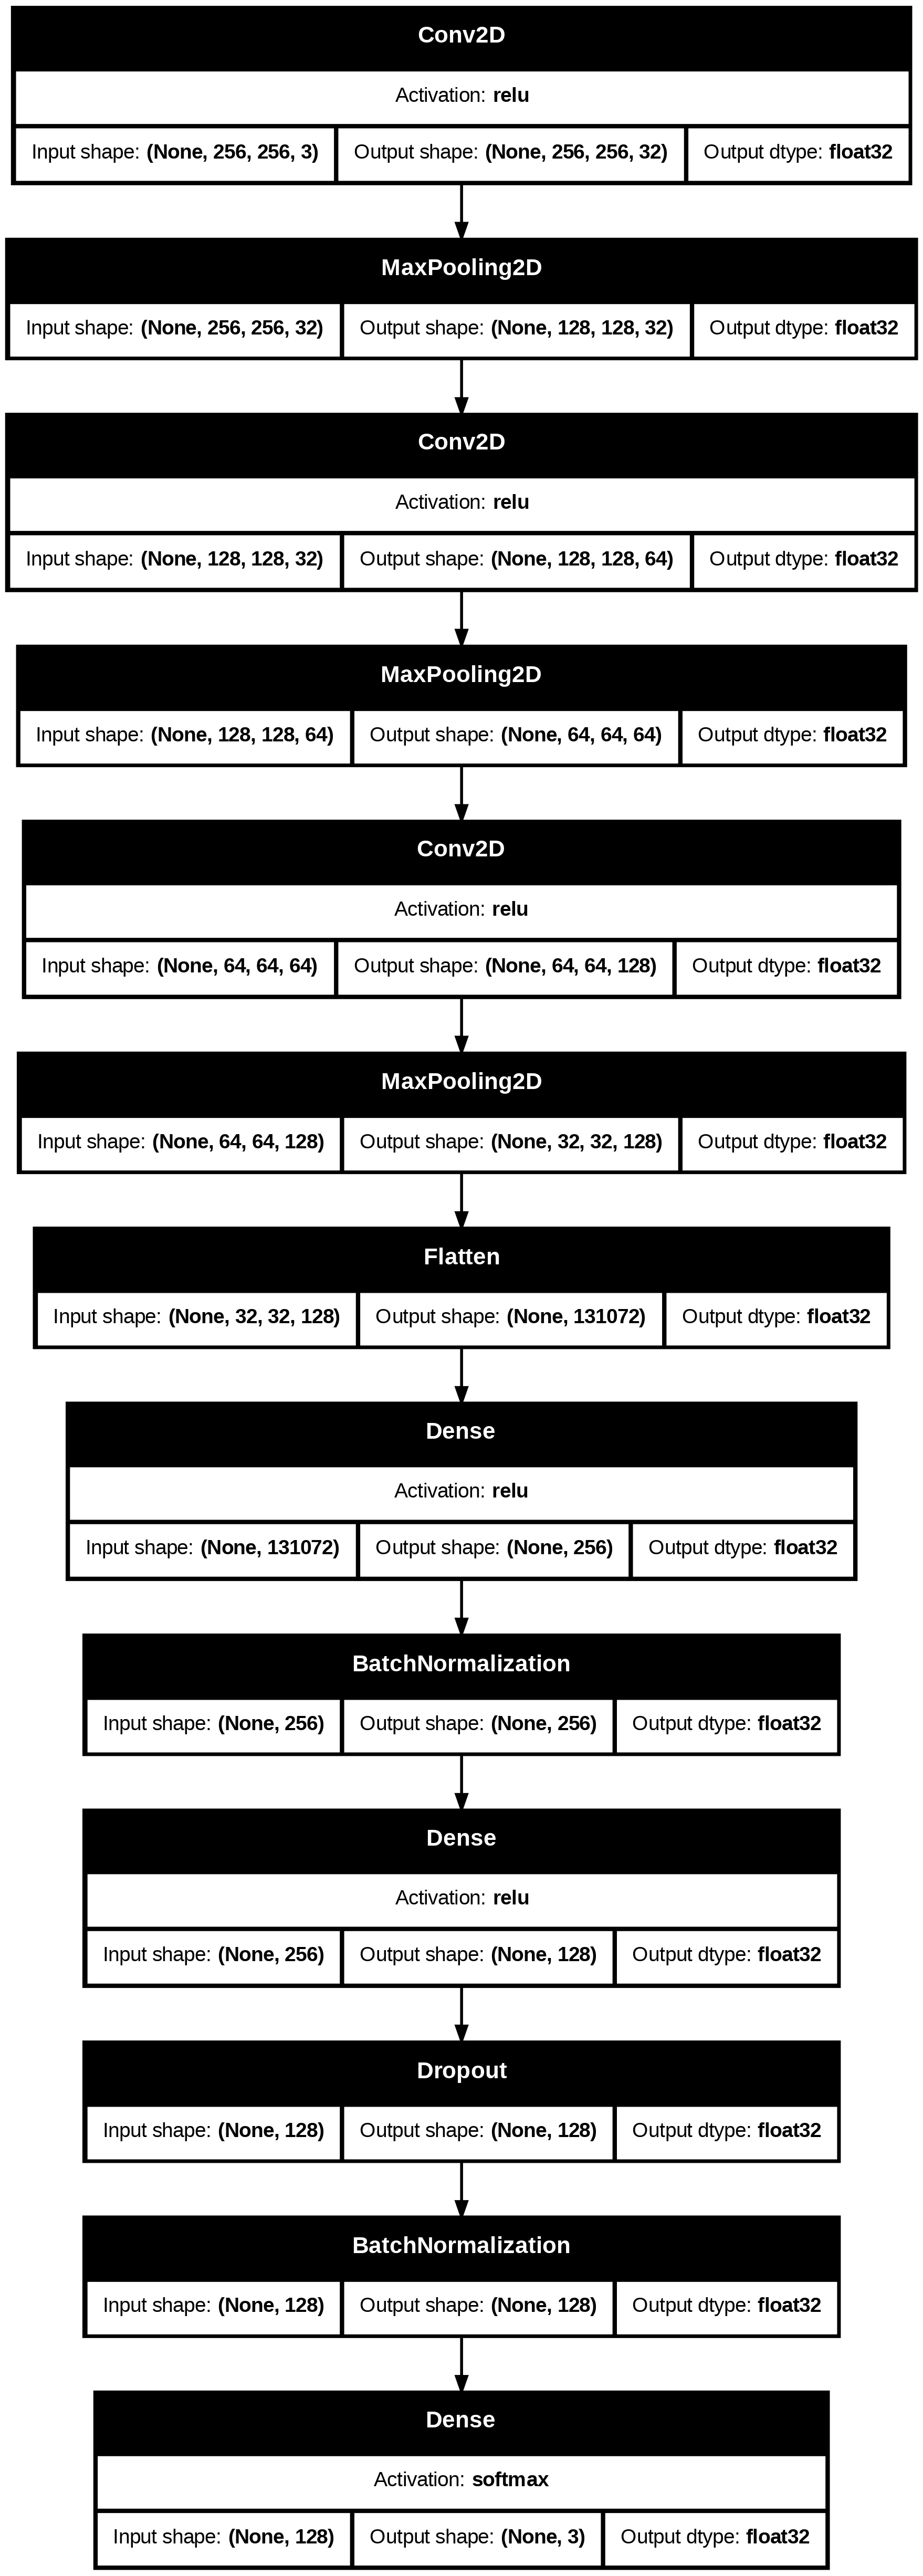

In [14]:
keras.utils.plot_model(model,
                       show_shapes=True,
                       show_dtype=True,
                      show_layer_activations=True)

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_accuracy') > 0.90:
			print('\n Validation accuracy has reached upto \
					90% so, stopping further training.')
			self.model.stop_training = True


es = EarlyStopping(patience=3,
				monitor='val_accuracy',
				restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)


In [17]:
history = model.fit(X_train,y_train,
                   validation_data=(X_test,y_test),
                   batch_size=64,
                   epochs=10,
                   verbose=1,
                   callbacks = [es, lr, myCallback()])

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.7817 - loss: 0.5197 - val_accuracy: 0.3290 - val_loss: 37.2485 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - accuracy: 0.8896 - loss: 0.2697 - val_accuracy: 0.4343 - val_loss: 6.4242 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.9212 - loss: 0.1977 - val_accuracy: 0.3637 - val_loss: 5.6278 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.9363 - loss: 0.1636 - val_accuracy: 0.8763 - val_loss: 0.3251 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.9427 - loss: 0.1420 - val_accuracy: 0.7270 - val_loss: 1.0341 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9662 - loss: 0.0950
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.96

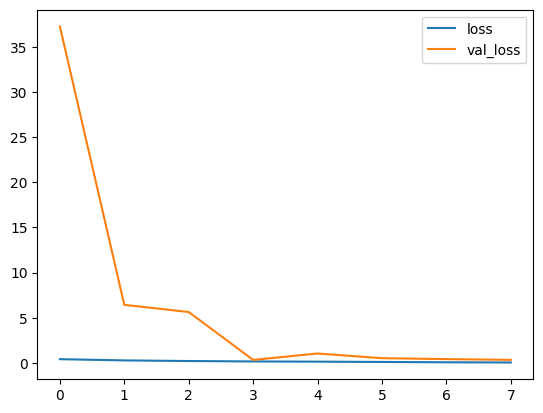

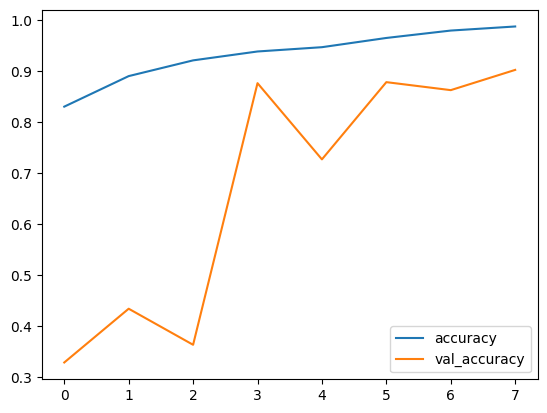

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [19]:
y_pred = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step


In [20]:
metrics.confusion_matrix(y_test, y_pred)


array([[ 944,   32,   11],
       [ 249,  728,    0],
       [   1,    0, 1035]])

In [21]:
print(metrics.classification_report(y_test, y_pred,
									target_names=classes))


              precision    recall  f1-score   support

    lung_aca       0.79      0.96      0.87       987
    lung_scc       0.96      0.75      0.84       977
      lung_n       0.99      1.00      0.99      1036

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000

